# An Exploration of Nueral Net Capabilities

In [5]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
matplotlib.style.use('ggplot')
import IPython as ipynb
%matplotlib inline

###Abstract

A nueral network is a computational analogy to the methods by which humans think. Their design builds upon the idea of a neuron either firing or not firing based on some stimuli and learn whether or not they made the right choice. To allow
for richer results with less complicated networks, boolean response is replaced with a continuous analog, the sigmoid
function. The network learns by taking our definition of how incorrect they are in the form of a so-called cost function and find the most effective way to reduce the function to a minimum, i.e. be the least incorrect. It is ideal to minimize the number of training sessions that must be used to get a maximum accuracy due to computational cost and time. In this
project, the minimum number of training sets to reach a sufficient accuracy will be explored for multiple standard cost functions. As well, a new cost function may be explored along with a method for generating cost functions. And finally,
given a sufficient amount of time, the network will be tested with nonconformant input, in this case, scanned and
partitioned handwritten digits.

###Base Question


Does it work?

Does it work well?

The first step in building a neural net is simply understanding and building the base algorithms. There are three things that define a network:

####Shape
The shape of a network merely describes how many neurons there are and where they are. There are typically the locations that neurons live in: The Input Layer, The Hidden Layer, and The Output Layer. The Hidden Layer can be composed of more than one layer, but by convention, it is referred to as one layer. The Input Layer is significant because it takes the inputs. It typically does not do any discrimination before passing it along, but there is nothing barring that from occurring. The Output Layer produces a result. In most cases, the result still requires some interpretation, but is in its final form as far as the network is concerned. Each of the layers can have as many neurons as are needed but it is favorable to reduce the number to the bare minimum for both computational reasons and for accuracy.


####Weights
Weights live in between individual neurons and dictate how much the decision made by a neuron in the layer before it matters to the next neurons decision. A good analogy might be that Tom(a neuron) has two friends, Sally(a neurette?) and Joe(also a neuron). They are good friends so Tom likes to ask Sally and Joe's opinion about decisions he is about to make. However, Joe is a bit crazy, likes to go out and party, etc. so Tom trusts Sally's opinion a bit more than Joe's. If Tom quantified how much he trusted Sally or Joe, that quantification would be called a weight.

####Biases
Biases are tied to each neuron and its decision making proccess. A bias in the boolean sense acts as a threshold at which point a true is returned. In the continuous generalization of the boolean proccess, the bias corresponds to the threshold at which point a value above 0.5 is returned. Back to our analogy with Tom and his friends, a bias might constitute how strongly each person feels about their opinion on a subject. So when Tim asks Sally and Joe about their opinion about someone else, call her Julie, Sally responds with a fairly nuetral response because she doesn't know Julie, so her bias is around 0. Joe, on the other hand, used to date Julie and they had a bad break up, so he responds quite negatively, and somewhat unintuitively, his bias is very high. (See the graph of the sigmoid function below with zero bias) In other words, he has a very high threshold for speaking positively about Julie.

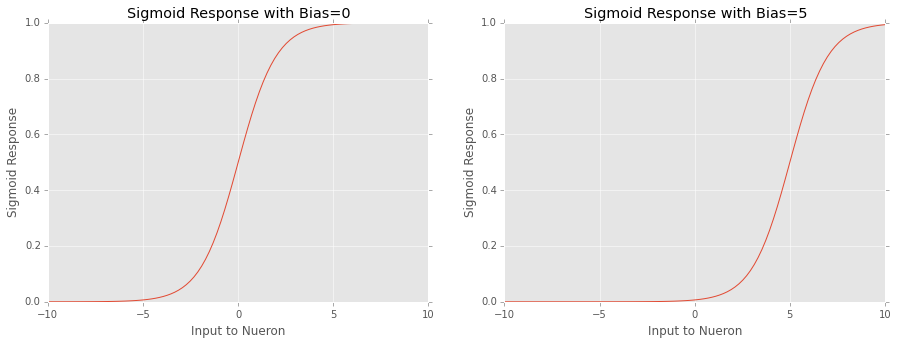

In [6]:
z = np.linspace(-10, 10, 100)
f=plt.figure(figsize=(15, 5))
plt.subplot(1, 2,1)
plt.plot(z, 1/(1+np.exp(-z)));
plt.xlabel("Input to Nueron")
plt.title("Sigmoid Response with Bias=0")
plt.ylabel("Sigmoid Response");
plt.subplot(1, 2,2)
plt.plot(z, 1/(1+np.exp(-z+5)));
plt.xlabel("Input to Nueron")
plt.title("Sigmoid Response with Bias=5")
plt.ylabel("Sigmoid Response");

###So, how does it work?

There are three core algorithms behind every neural net: Feed Forward, Back Propagation/Error Computation, and Gradient Descent. 

###Feed Forward
The Feed Forward algorithm could be colloquially called the "Gimme an Answer" algorithm. It sends the inputs through the network and returns the outputs. We can break it down step by step and see what is really going on:

####Inputs
Each input value is fed into the corresponding input nueron, that's it. In a more sophisticated network, some inputs could be rejected based on bias criterion, but for now we leave them alone.

####Channels
Each input neuron is connected to every neuron in the first hidden layer through a channel, to see this visually, look at the diagram below. Each channel is given a weight that is multiplied by the value passed on by the input neuron and is then summed with all the channels feeding the same neuron and is passed into the hidden layer neuron. The channels can be thought of as pipes allowing water to flow from each input neuron to each hidden layer neuron. The weights in our network represent the diameter of these pipes(is it large or small). As well, pipes converge to a hidden layer neuron and dump all of their water into a basin representing the neuron. 

####Neurons
Once a value reaches a neuron that is not an input neuron, the value is passed through a sigmoid function similar to those above with the proper bias for that neuron. The sigmoid response is the value that gets passed on to the next layer of neurons.

####Repeat
The *Channels* and *Neurons* steps are repeated through each layer until the final output is reached.

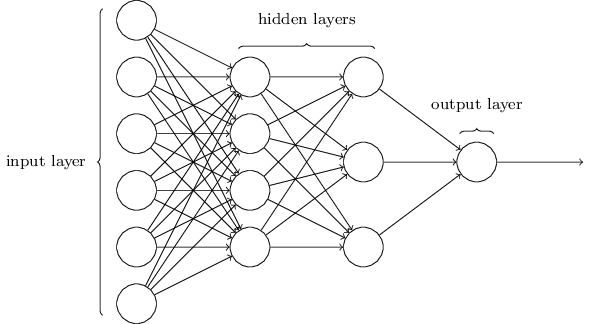

In [7]:
ipynb.display.Image("http://neuralnetworksanddeeplearning.com/images/tikz11.png")

###Back Propagation/Error Computation
Back Propagation is one of the scary buzz words in the world of neural nets, it doesn't have to be so scary. I prefer to call it error computation to be more transparent because, in essence, that is what it does. Let's dig in!

####Cost Function
The cost function is a major factor in how your network learns. It defines, numerically, how wrong your network is. The function itself is typically defined by some sort of difference of your networks output to the actual correct answer. Because it is a function of the output, it is also a function of every weight and bias in your network. This means that it could have potentially thousands of independant variables. In its simplest form, a cost function should have some quite definite properties: when the ouput is near the correct answer, the cost function should be near zero, a small change in any single weight or bias should result in a small change in the cost function, and the cost function must be non-negative everywhere.

####Error Computation
Through a set of nifty equations which will not be shown here, once you have a cost function and take the gradient with respect to the output of said cost function, you are able to calculate a metric for the error of the output. Through some clever deductions based on the fact that a small change in any independent variable results in a small change in the cost function we can calculate that same metric for each independent variable. (That is the Back Propagation bit) You can then calculate, through further clever deductions, the partial derivative of the cost function with respect to each independent variable. The partial derivative of the cost function with respect to each variable will come in handy for when we do *Gradient* Descent.

###Gradient Descent
Gradient Descent uses the fact that we want to minimize our cost function together with the idea of the gradient as the path of steepest descent.

####Down the Mountain
The Gradient Descent uses the gradients we calculated in the Error Computation step and tells us how we should change our variables if we want to reach a minimum in the fastest way possible. The algorithm usess the fact that the gradient with respect to an independent variable represents the component of the vector pointing in the direction of most change in that variables dimension. Because even Euler couldn't imagine a thousand dimensional space, we draw some intuition from the familiar three dimensioanl case. Suppose that you are dropped at a random location on a mountain. Suppose further that you are blind.(or it is so foggy that you can't see anything) How do you find the fastest way to the bottom? Well, the only thing that you can do is sense the slope that seems to be the steepest and walk down it. But you are a mathemetician and have no grasp on estimating things, so you calculate the gradient with respect to your left-right direction and your front-back direction. You see that if you take a half step to the left and a quarter step forward you will move the furthest downwards. Wait! Why just one step? First of all, mountains are complicated surfaces and their slopes change from place to place so continuing to make the same steps may not take you the most downwards, or even downwards at all. Secondly, you are blind!(or it is really foggy) If you start running or jumping down the slope, you may overshoot a minimum and have to stop and turn around. In the actual gradient descent algorithm, the step size is represented by something called the learning rate. A step in the right direction is performed in the algorithm by reducing each individual variable by this learning constant multiplied by the gradient with respect to that particular variable. After doing this thousands of times, we find the local minimums of our cost funtion.

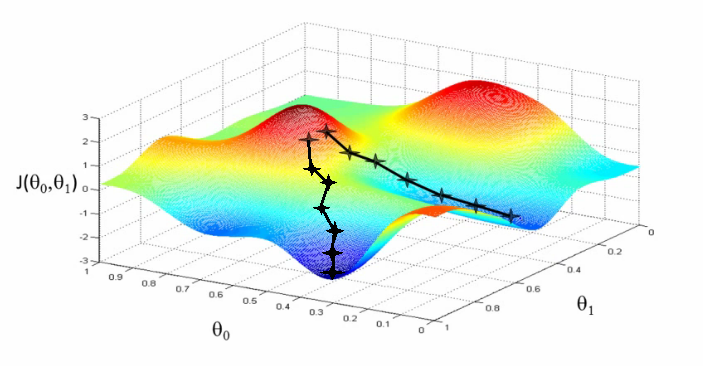

In [8]:
ipynb.display.Image("http://blog.datumbox.com/wp-content/uploads/2013/10/gradient-descent.png")

As a function of two variables, we see a cost function in three dimensions and two paths that could be taken in an effort to descend down the mountain. Notice the stars represent small steps in the downward direction.

###And after all that, what do we get?

After the network is "trained", it should be able to perform whatever task it is that it was trained in to some degree of accuracy.